# Assignment 1 Solution (CSC420 - Winter 2023)

### Sailing Ni (1004936019)

## Question 6 - Edge Detection

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

### Step 1: Gaussian Blurring

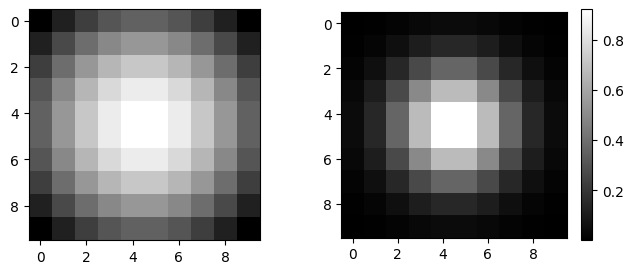

In [134]:

def gaussian_matrix(size, sigma):
    """
    Return a size * size gaussian matrix given size and sigma.
    """
    x, y = np.meshgrid(np.linspace(-1, 1, size), np.linspace(-1, 1, size))
 
    # lower normal part of gaussian
    normal = 1/(2 * np.pi * sigma**2)
 
    # Calculating Gaussian filter
    gauss_matrix = np.exp(-(((x**2+y**2))/ (2.0 * sigma**2))) * normal
    return gauss_matrix

def plot_gaussian_matrix(matrix):
    fig, ax = plt.subplots(figsize=(8, 3), ncols=2)
    im = ax.imshow(matrix)
    fig.colorbar(im, orientation='vertical')
    
def test_step1():
    fig, (ax1, ax2) = plt.subplots(figsize=(8, 3), ncols=2)
    tmp = gaussian_matrix(10, 1)
    tmp2 = gaussian_matrix(10, 0.4)
    ax1.imshow(tmp, cmap='gray')
    pos = ax2.imshow(tmp2, cmap='gray')
    fig.colorbar(pos, orientation='vertical')
    plt.show()

test_step1()


### Step 2: Gradient Magnitude

In [135]:
def convolution(img, filter):
    """
    Return Convolution of image with fitler
    """
    # flip the filter
    filter = np.flip(filter, 0)
    filter = np.flip(filter, 1)
    # set up constants for filter and image shape
    f1, f2 = filter.shape
    h,w = img.shape
    result = np.zeros_like(img)
    # pad image with zeroes
    image_padded = np.zeros((h + (f1-1), w + (f2-1)))   
    image_padded[(f1//2):-(f1//2), (f1//2):-(f2//2)] = img
    # use for loop to apply convolution
    for x in range(h):
        for y in range(w):
            result[x, y] = (filter*image_padded[x:x + f1, y:y + f2]).sum()
    return result

def gradient_magnitude(img):
    # set up sobel filter x and y
    x = np.asarray([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    y = np.asarray([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], np.float32)
    # apply convolution
    g_x = convolution(img, x)
    g_y = convolution(img, y)
    g_xy = np.sqrt(g_x**2 + g_y**2)
    return g_xy


### Step 3: Threshold Algorithm

In [136]:
def threshold_algo(grad_matrix):
    """Find the threshold algorithm so that the edges can be determined"""
    curr = np.mean(grad_matrix)
    i = 0
    # while loop until prev and curr and close
    while True:
        meanl = np.mean(grad_matrix[grad_matrix < curr])
        meanh = np.mean(grad_matrix[grad_matrix >= curr])
        prev, curr = curr, (meanl + meanh)/2
        if np.isclose(prev, curr):
            break
        i += 1
    # use threoshold to map edge matrix
    threshold = curr
    edge_matrix = np.zeros_like(grad_matrix)
    edge_matrix[grad_matrix >= threshold] = 255
    return edge_matrix

### Step 4: Test

##### 4-1: define test function for any image file

In [137]:
# define test function for 
def test(image_file, kernel_size, sigma):
    img = cv2.imread(image_file)
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY)
    # Apply Gaussian Blurring
    gaussian = gaussian_matrix(kernel_size, sigma)
    blurred_img = convolution(gray, gaussian)
    # Get the Gradient Magnitude
    grad_matrix = gradient_magnitude(blurred_img)
    # Apply Threshold Algorithm
    edge_matrix = threshold_algo(grad_matrix)

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))
    ax1, ax2, ax3, ax4 = axes.flatten()
    ax1.imshow(gray, cmap='gray')
    ax1.set_title('Original')
    ax2.imshow(blurred_img, cmap='gray')
    ax2.set_title('Gaussian Blur')
    ax3.imshow(grad_matrix, cmap='gray')
    ax3.set_title('Gradient Magnitude')
    ax4.imshow(edge_matrix, cmap='gray')
    ax4.set_title('Edge-Mapped')
    plt.show()

#### 4-2: test step 1 - get gaussian matrix

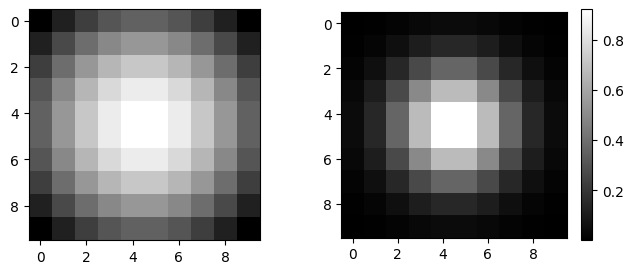

In [138]:
test_step1()

##### 4-3: test all steps 

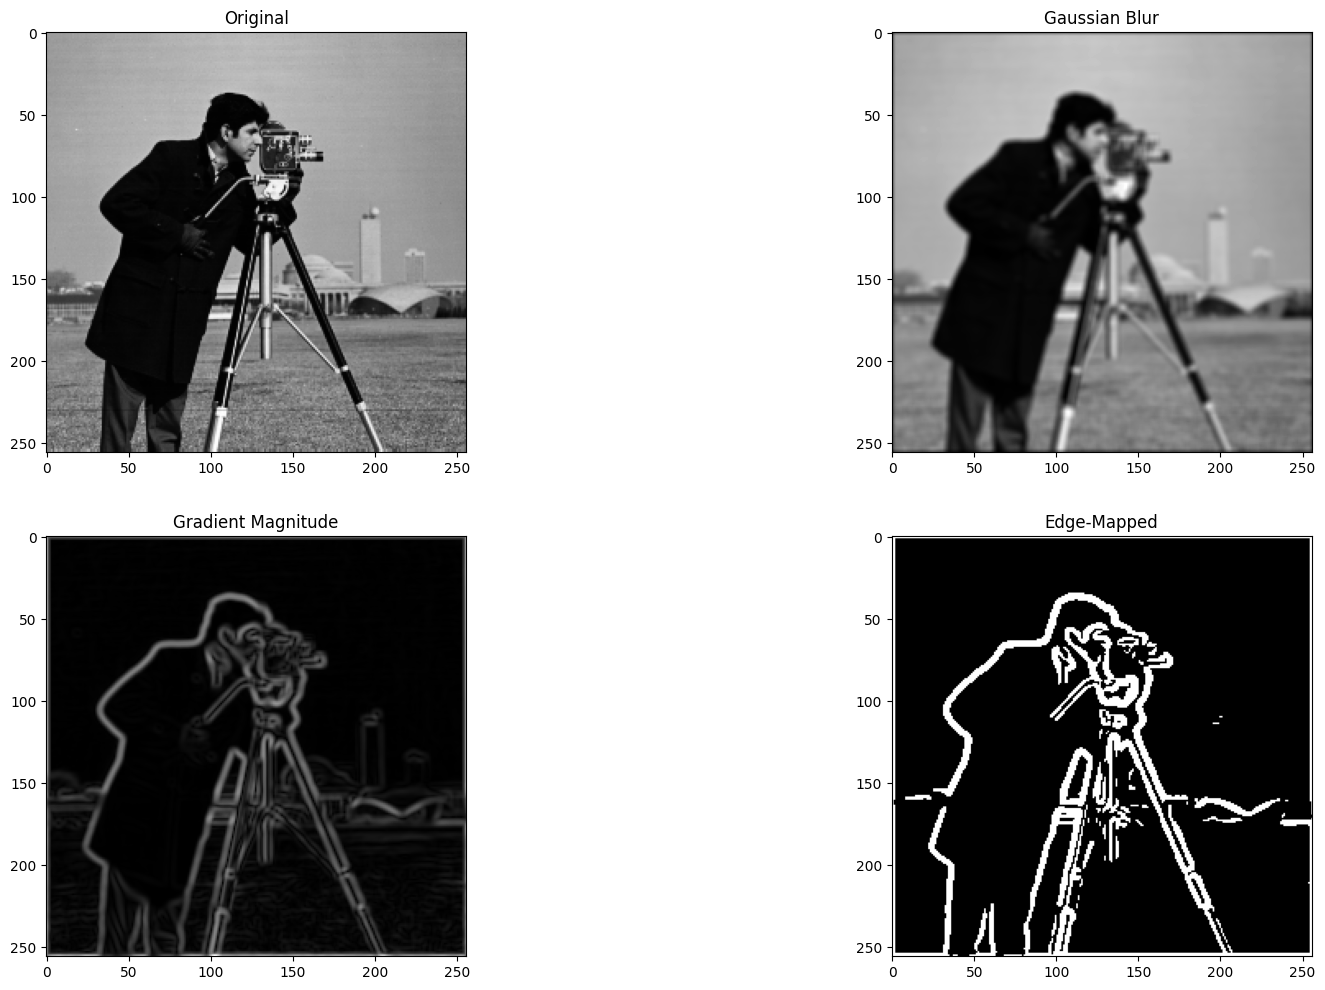

In [139]:
# test on image1
test('./image.png', 5, 1)

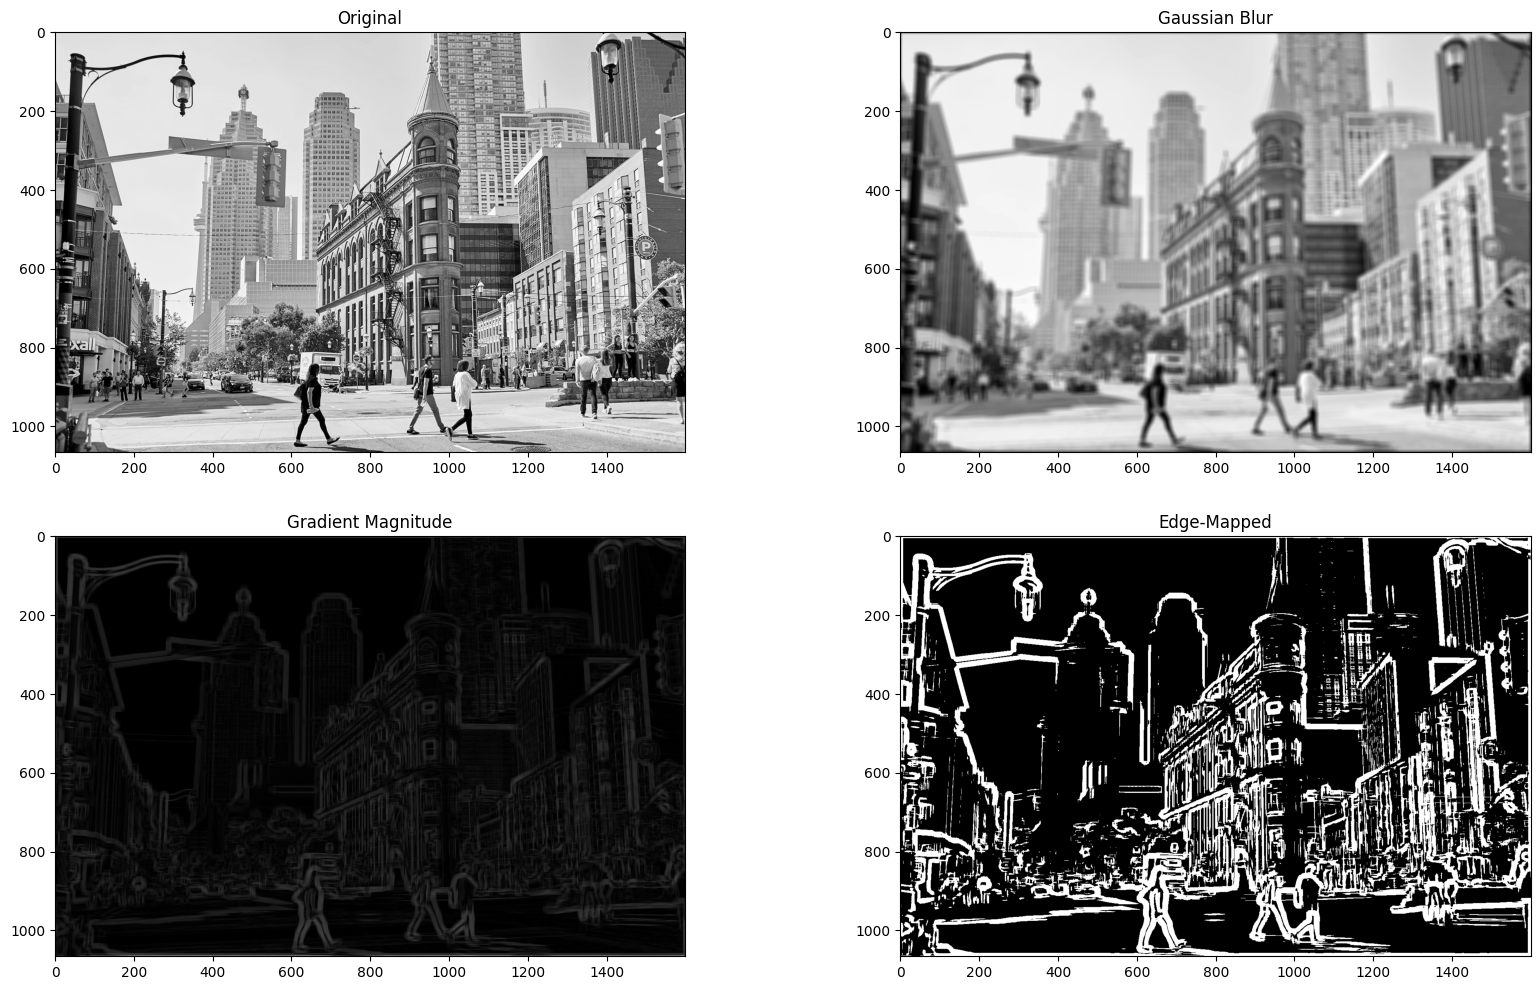

In [140]:
# test on image2
test('./toronto.jpg', 15, 2)

## Conclusion:
- Overall the Sobel edge detection algorithm works fine on both images. We can see major line segments are detected and we can see the structure of the buildings and people. However, some finer details are lost, such as the white buildings on the right bottom of image1 and the windows of buildings in iamge2.

- Strengths: 
1. Simplicity: compared to canny detection, the algorithm is much simpler using its gradient calculation, with more time efficiency.
2. Effectiveness: it can detect edges and their orientations.
- Weaknesses: 
1. Inaccurate: Sobel algorithm detects rough and thick edges, and loses finer details in smooth and think edges.
2. High sensitivity to noise.
